In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
# Load data from JSON file
json_file_fo_global = "logs/label_permuted_cifar10_stats/upgd_fo_global/convolutional_network_relu_with_hooks/lr_0.01_beta_utility_0.999_sigma_0.001_weight_decay_0.0/19.json"  # Replace with your JSON file path
json_file_upgd_kernel = "logs/label_permuted_cifar10_stats/upgd_kernel/convolutional_network_relu_with_hooks/lr_0.01_beta_utility_0.999_sigma_0.001_weight_decay_0.0/19.json"

with open(json_file_fo_global, "r") as file:
    data_fo_global = json.load(file)
with open(json_file_upgd_kernel, "r") as file:
    data_upgd_kernel = json.load(file)


# Extract accuracies and plasticity for both models
column_kernel_accuracies = data_upgd_kernel["accuracies"]
column_kernel_plasticity = data_upgd_kernel["plasticity_per_task"]
fo_global_accuracies = data_fo_global["accuracies"]
fo_global_plasticity = data_fo_global["plasticity_per_task"]


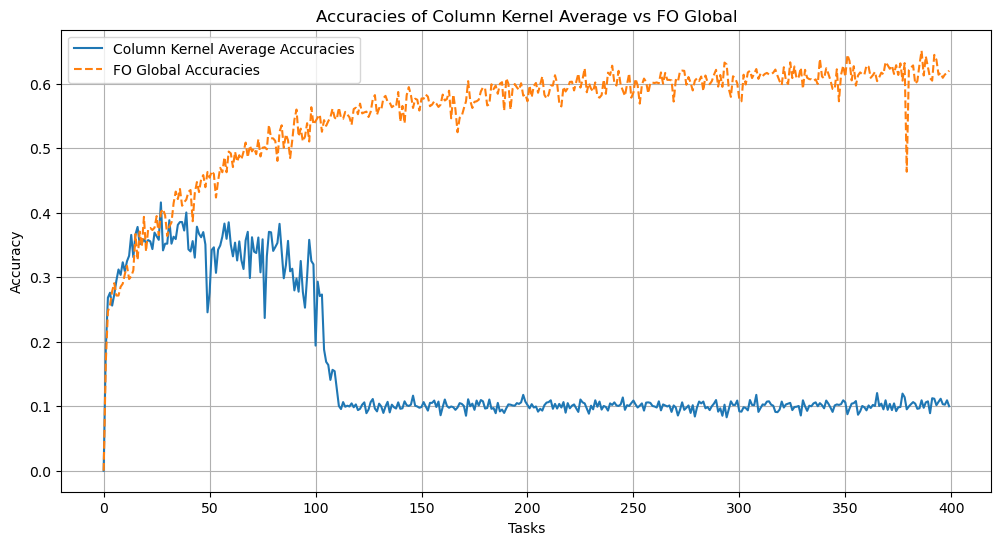

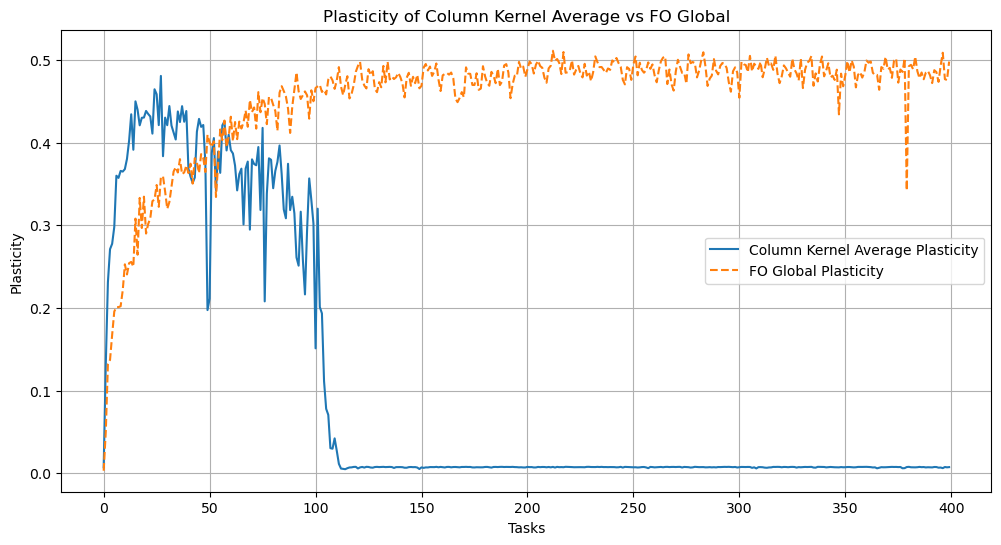

In [4]:
# Ensure equal lengths for plotting plasticity
min_length_plasticity = min(len(column_kernel_plasticity), len(fo_global_plasticity))
column_kernel_plasticity = column_kernel_plasticity[:min_length_plasticity]
fo_global_plasticity = fo_global_plasticity[:min_length_plasticity]

# Create x-axis for tasks
tasks_kernel = list(range(len(column_kernel_accuracies)))
tasks_global = list(range(len(fo_global_accuracies)))
tasks_plasticity = list(range(min_length_plasticity))

# Plot accuracies
plt.figure(figsize=(12, 6))
plt.plot(tasks_kernel, column_kernel_accuracies, label="Column Kernel Average Accuracies", linestyle='-')
plt.plot(tasks_global, fo_global_accuracies, label="FO Global Accuracies", linestyle='--')
plt.title("Accuracies of Column Kernel Average vs FO Global")
plt.xlabel("Tasks")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot plasticity
plt.figure(figsize=(12, 6))
plt.plot(tasks_plasticity, column_kernel_plasticity, label="Column Kernel Average Plasticity", linestyle='-')
plt.plot(tasks_plasticity, fo_global_plasticity, label="FO Global Plasticity", linestyle='--')
plt.title("Plasticity of Column Kernel Average vs FO Global")
plt.xlabel("Tasks")
plt.ylabel("Plasticity")
plt.legend()
plt.grid(True)
plt.show()
